In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from feature_builder import process_dataset
import seaborn as sns
import numpy as np

In [2]:
x_train = pd.read_csv('train.csv')
y_train=x_train[['id','target']]

In [3]:
x_train_features = process_dataset(x_train)
x_train_feat, x_test_feat, y_train_feat, y_test_feat = train_test_split(x_train_features, y_train, test_size = .33, random_state = 17)

In [4]:
rforest = RandomForestRegressor(random_state=1, n_estimators=1000, max_depth=4)

rforest.fit(x_train_feat, y_train_feat['target'])

predictions=rforest.predict(x_test_feat)

Text(0, 0.5, 'Features')

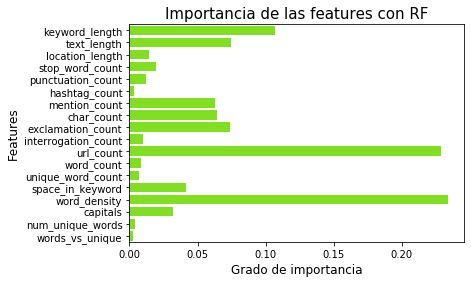

In [5]:
#En clase recomendaron usar RF para feature importance
#En base a estas metricas se puede determinar la importancia de las features para saber su efecto
g = sns.barplot(rforest.feature_importances_, x_train_feat.columns, orient='h', color='chartreuse')
g.set_title("Importancia de las features con RF", fontsize=15)
g.set_xlabel("Grado de importancia", fontsize=12)
g.set_ylabel("Features", fontsize=12)

Correlaciones lineales entre features

In [11]:
limit = 0.85
corr_matrix=x_train_feat.corr().abs()
corr_matrix.head()

,keyword_length,text_length,location_length,stop_word_count,punctuation_count,hashtag_count,mention_count,char_count,exclamation_count,interrogation_count,url_count,word_count,unique_word_count,space_in_keyword,word_density,capitals,num_unique_words,words_vs_unique
keyword_length,1.000000,0.128480,0.009064,0.027370,0.043612,0.062536,0.015868,0.128480,0.010952,0.033984,0.045128,0.040986,0.043513,0.638505,0.142683,0.027806,0.043513,0.006290
text_length,0.128480,1.000000,0.038824,0.426417,0.479416,0.211403,0.067415,1.000000,0.030405,0.063310,0.297900,0.840073,0.850731,0.085194,0.109555,0.284075,0.850731,0.239238
location_length,0.009064,0.038824,1.000000,0.026753,0.006232,0.004882,0.056568,0.038824,0.016844,0.023604,0.038018,0.037460,0.039011,0.019472,0.014977,0.026970,0.039011,0.011984
stop_word_count,0.027370,0.426417,0.026753,1.000000,0.232255,0.131979,0.058425,0.426417,0.041906,0.034235,0.392569,0.764750,0.726691,0.021120,0.629163,0.178665,0.726691,0.427256
punctuation_count,0.043612,0.479416,0.006232,0.232255,1.000000,0.373300,0.014193,0.479416,0.121763,0.261766,0.681240,0.124340,0.142706,0.000631,0.514591,0.370059,0.142706,0.035016


In [12]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,keyword_length,text_length,location_length,stop_word_count,punctuation_count,hashtag_count,mention_count,char_count,exclamation_count,interrogation_count,url_count,word_count,unique_word_count,space_in_keyword,word_density,capitals,num_unique_words,words_vs_unique
keyword_length,NaN,0.12848,0.009064,0.027370,0.043612,0.062536,0.015868,0.128480,0.010952,0.033984,0.045128,0.040986,0.043513,0.638505,0.142683,0.027806,0.043513,0.006290
text_length,NaN,NaN,0.038824,0.426417,0.479416,0.211403,0.067415,1.000000,0.030405,0.063310,0.297900,0.840073,0.850731,0.085194,0.109555,0.284075,0.850731,0.239238
location_length,NaN,NaN,NaN,0.026753,0.006232,0.004882,0.056568,0.038824,0.016844,0.023604,0.038018,0.037460,0.039011,0.019472,0.014977,0.026970,0.039011,0.011984
stop_word_count,NaN,NaN,NaN,NaN,0.232255,0.131979,0.058425,0.426417,0.041906,0.034235,0.392569,0.764750,0.726691,0.021120,0.629163,0.178665,0.726691,0.427256
punctuation_count,NaN,NaN,NaN,NaN,NaN,0.373300,0.014193,0.479416,0.121763,0.261766,0.681240,0.124340,0.142706,0.000631,0.514591,0.370059,0.142706,0.035016


In [15]:
linear_combs = [column for column in upper.columns if any(upper[column] > limit)]

In [16]:
print(linear_combs)

['char_count', 'unique_word_count', 'num_unique_words']
